In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import time
main_df = pd.read_parquet('update_file.parquet')

In [2]:
main_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PULatitude,PULongitude,DOLatitude,DOLongitude
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,0.00,0.00,1.0,22.70,2.5,0.0,40.751511,-73.990150,40.729269,-73.987361
1,2,2024-01-01 00:36:44,2024-01-01 00:54:40,1.0,1.20,1.0,N,186,48,1,...,4.26,0.00,1.0,25.56,2.5,0.0,40.751511,-73.990150,36.103413,-84.131863
2,1,2024-01-01 00:22:00,2024-01-01 01:06:35,1.0,3.50,1.0,N,186,239,1,...,8.30,0.00,1.0,49.90,2.5,0.0,40.751511,-73.990150,-35.015787,138.636155
3,2,2024-01-01 00:52:10,2024-01-01 01:11:23,1.0,2.87,1.0,N,186,4,1,...,1.20,0.00,1.0,26.00,2.5,0.0,40.751511,-73.990150,40.725102,-73.979583
4,2,2024-01-01 00:16:25,2024-01-01 00:52:16,1.0,1.73,1.0,N,186,48,1,...,6.78,0.00,1.0,40.68,2.5,0.0,40.751511,-73.990150,36.103413,-84.131863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952601,2,2024-01-26 07:53:57,2024-01-26 08:16:50,NaN,8.26,NaN,None,214,21,0,...,0.00,6.94,1.0,32.32,NaN,NaN,25.774429,-80.133241,NaN,NaN
2952602,2,2024-01-03 05:18:23,2024-01-03 05:50:11,NaN,21.19,NaN,None,115,75,0,...,0.00,6.94,1.0,73.02,NaN,NaN,40.618715,-74.093475,NaN,NaN
2952603,2,2024-01-31 21:49:13,2024-01-31 21:50:20,NaN,0.27,NaN,None,115,115,0,...,3.69,0.00,1.0,22.15,NaN,NaN,40.618715,-74.093475,40.618715,-74.093475
2952604,2,2024-01-04 00:15:32,2024-01-04 00:55:20,NaN,29.58,NaN,None,204,82,0,...,0.00,13.88,1.0,77.71,NaN,NaN,39.136110,-95.951656,41.899474,-87.940342


In [ ]:
## Data Preprocessing

In [3]:
main_df.shape

(2952606, 23)

In [2]:
main_df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          139714
trip_distance                 0
RatecodeID               139714
store_and_fwd_flag       139714
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     139714
Airport_fee              139714
PULatitude                21705
PULongitude               21705
DOLatitude                67236
DOLongitude               67236
dtype: int64

In [3]:
main_df.dropna(inplace=True)
main_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
PULatitude               0
PULongitude              0
DOLatitude               0
DOLongitude              0
dtype: int64

In [8]:
main_df['passenger_count'].value_counts()

passenger_count
1.0    2117340
2.0     392914
3.0      88501
4.0      50488
5.0      32337
0.0      29691
6.0      21649
8.0         18
7.0          5
9.0          1
Name: count, dtype: int64

In [4]:
main_df.drop(main_df[main_df['passenger_count'] == 0].index, inplace=True)
main_df['passenger_count'].value_counts()

passenger_count
1.0    2117340
2.0     392914
3.0      88501
4.0      50488
5.0      32337
6.0      21649
8.0         18
7.0          5
9.0          1
Name: count, dtype: int64

In [12]:
main_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].max()

tpep_pickup_datetime    2024-02-01 00:01:15
tpep_dropoff_datetime   2024-02-02 13:56:52
dtype: datetime64[ns]

In [13]:
main_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].min()

tpep_pickup_datetime    2002-12-31 22:59:39
tpep_dropoff_datetime   2002-12-31 23:05:41
dtype: datetime64[ns]

In [5]:
import warnings
warnings.filterwarnings('ignore')
main_df['tpep_pickup_datetime'] = pd.to_datetime(main_df['tpep_pickup_datetime'])
main_df = main_df[(main_df['tpep_pickup_datetime'].dt.year >= 2023) & (main_df['tpep_pickup_datetime'].dt.year <= 2024)]
main_df.reset_index(drop=True, inplace=True)

In [6]:
main_df['tpep_dropoff_datetime'] = pd.to_datetime(main_df['tpep_dropoff_datetime'])
main_df = main_df[(main_df['tpep_dropoff_datetime'].dt.year >= 2023) & (main_df['tpep_dropoff_datetime'].dt.year <= 2024)]
main_df.reset_index(drop=True, inplace=True)

In [16]:
main_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].max()

tpep_pickup_datetime    2024-02-01 00:01:15
tpep_dropoff_datetime   2024-02-02 13:56:52
dtype: datetime64[ns]

In [17]:
main_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].min()

tpep_pickup_datetime    2023-12-31 23:39:17
tpep_dropoff_datetime   2023-12-31 23:42:00
dtype: datetime64[ns]

In [7]:
same_datetime_mask = main_df['tpep_pickup_datetime'] == main_df['tpep_dropoff_datetime']
same_datetime_rows = main_df[same_datetime_mask]
print(same_datetime_rows)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4876            2  2024-01-02 17:55:21   2024-01-02 17:55:21              1.0   
104397          1  2024-01-03 19:14:19   2024-01-03 19:14:19              1.0   
125879          1  2024-01-16 05:51:31   2024-01-16 05:51:31              1.0   
250758          1  2024-01-24 13:15:44   2024-01-24 13:15:44              1.0   
303782          1  2024-01-13 00:26:55   2024-01-13 00:26:55              2.0   
450241          1  2024-01-23 18:48:59   2024-01-23 18:48:59              1.0   
659700          1  2024-01-05 17:32:49   2024-01-05 17:32:49              1.0   
814228          1  2024-01-20 16:00:43   2024-01-20 16:00:43              2.0   
912881          2  2024-01-06 00:27:27   2024-01-06 00:27:27              1.0   
929444          2  2024-01-09 17:40:00   2024-01-09 17:40:00              1.0   
1000188         2  2024-01-26 12:41:49   2024-01-26 12:41:49              1.0   
1071435         1  2024-01-2

In [8]:
same_datetime_mask = main_df['tpep_pickup_datetime'] == main_df['tpep_dropoff_datetime']
main_df = main_df.drop(main_df[same_datetime_mask].index)

In [14]:
main_df.shape

(2703213, 23)

In [9]:
main_df = main_df.drop(main_df.index[1000000:])

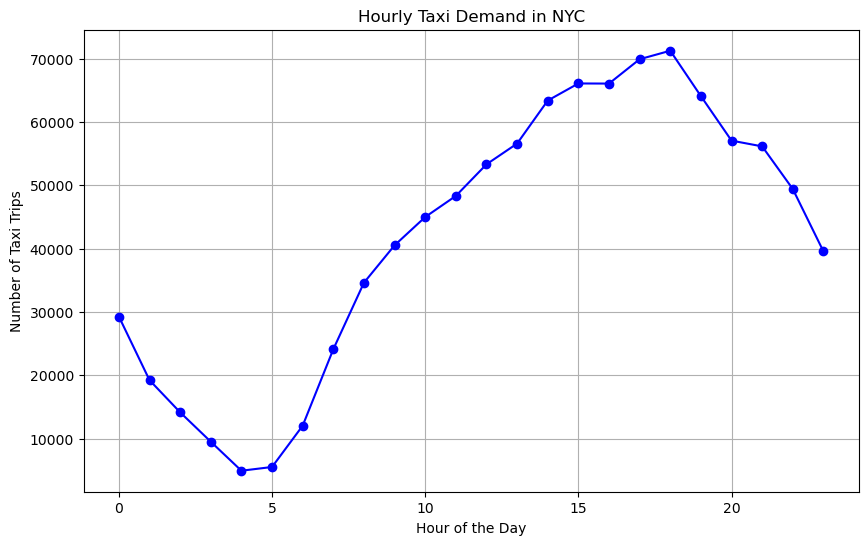

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
main_df['tpep_pickup_datetime'] = pd.to_datetime(main_df['tpep_pickup_datetime'])
main_df['hour'] = main_df['tpep_pickup_datetime'].dt.hour
hourly_count = main_df.groupby('hour').size()
plt.figure(figsize=(10, 6))
plt.plot(hourly_count.index, hourly_count.values, marker='o', color='b')
plt.title('Hourly Taxi Demand in NYC')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Trips')
plt.grid(True)
plt.show()

In [9]:
import datetime
def timezone(x):
    if x>=datetime.time(0, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'Morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(15, 0, 0):
        return 'Afternoon'
    elif x>=datetime.time(15, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'Evening'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(23, 59, 59):
        return 'Night'
    
main_df['tpep_pickup_timezone']= main_df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
main_df['pickup_day']= main_df['tpep_pickup_datetime'].dt.day_name()

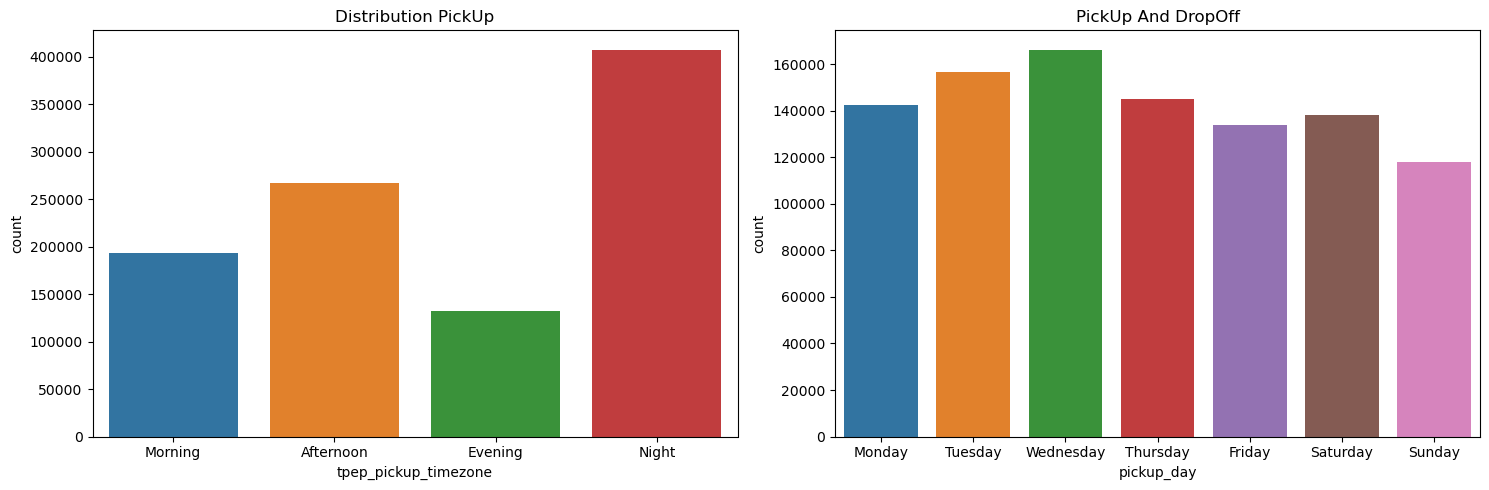

In [10]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(x='tpep_pickup_timezone',data=main_df,ax=ax[0])
ax[0].set_title('Distribution PickUp',fontsize="12")

sns.countplot(x='pickup_day',data=main_df,ax=ax[1])
ax[1].set_title('PickUp And DropOff',fontsize="12")
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12864\525013583.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


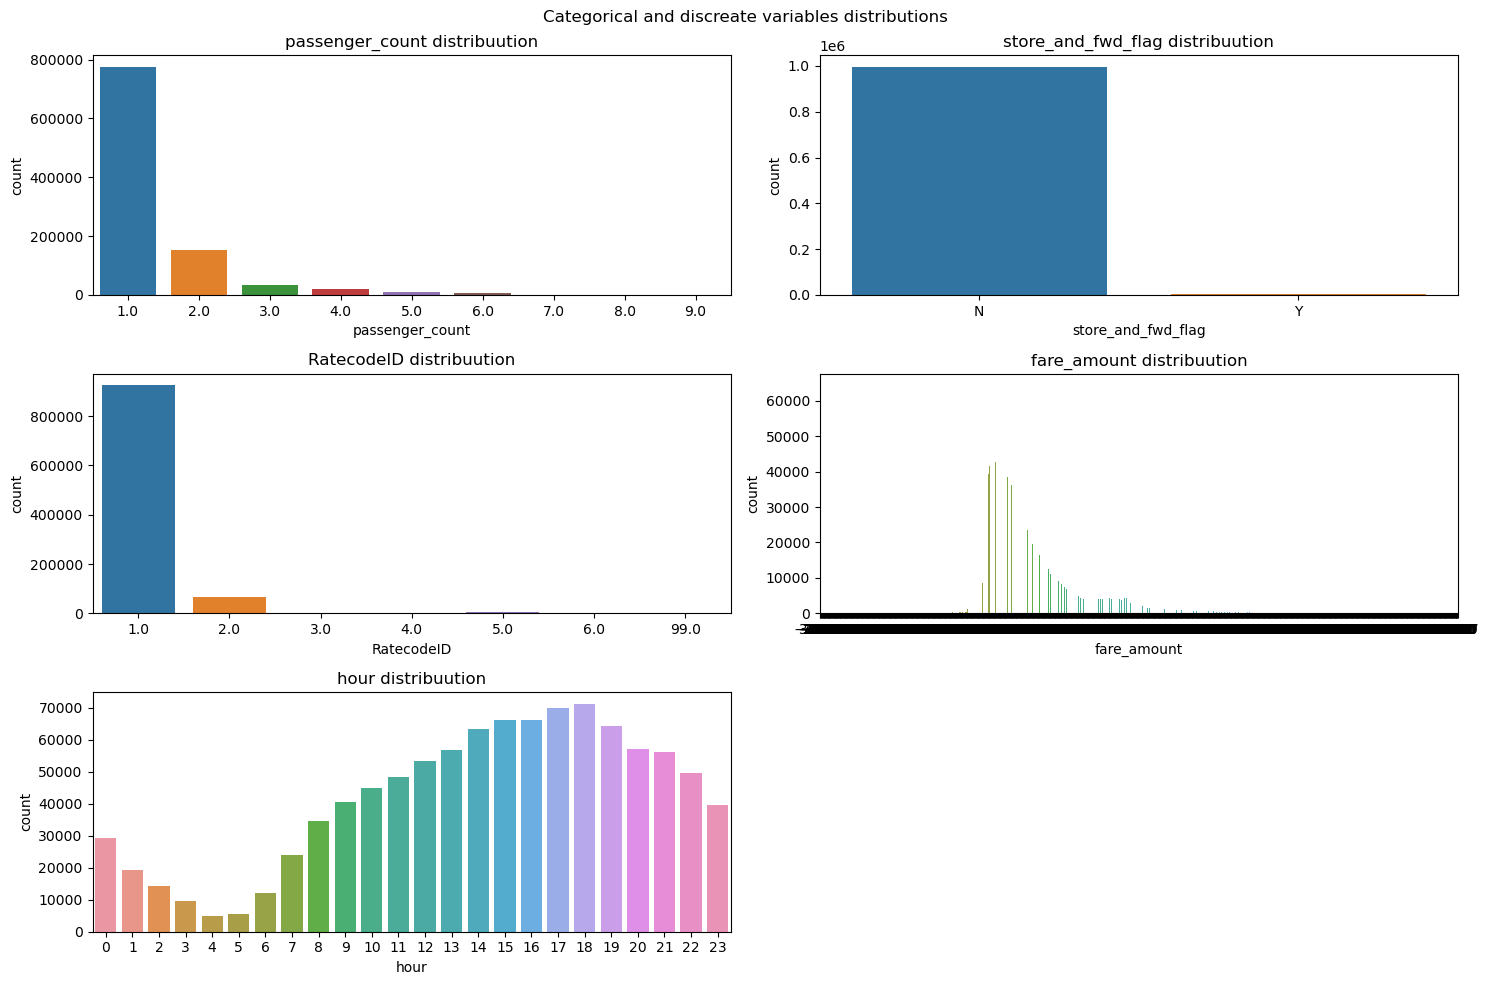

In [16]:
fig = plt.figure(figsize=(15,10))
for idx,col in enumerate(['passenger_count','store_and_fwd_flag','RatecodeID','fare_amount','hour']):
    fig.add_subplot(3,2,idx+1)
    countplot = sns.countplot(data= main_df,x=col)
    countplot.set(title=f'{col} distribuution')
    
fig.suptitle('Categorical and discreate variables distributions')
fig.tight_layout()
fig.show()

Text(0, 0.5, 'Trips')

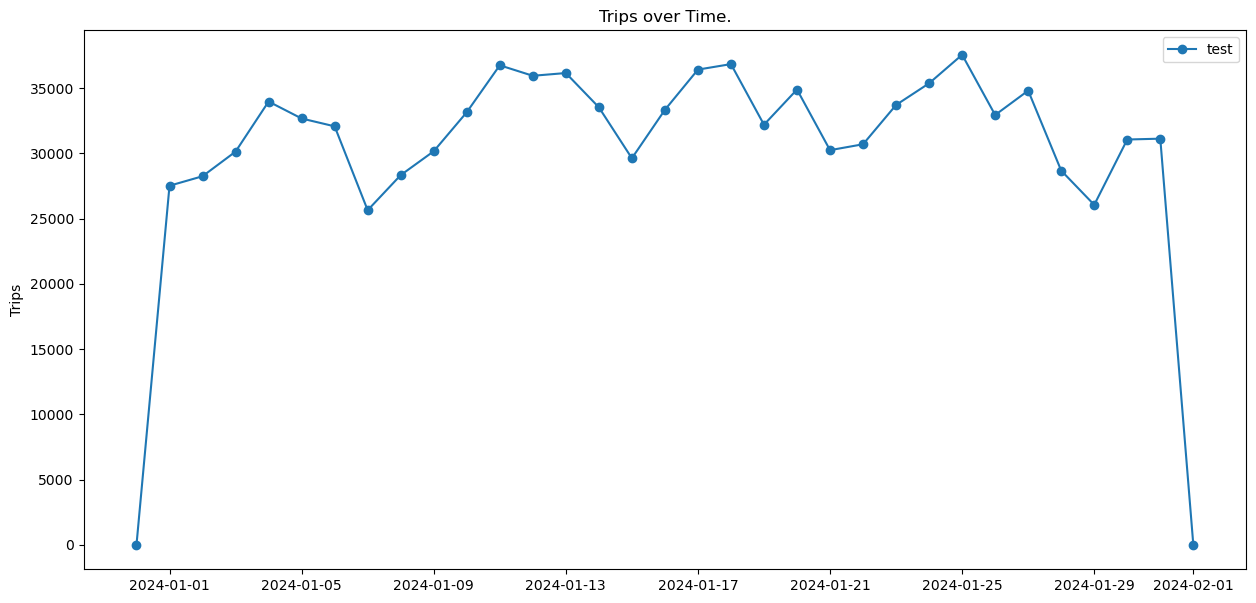

In [11]:
main_df['tpep_pickup_datetime'] = pd.to_datetime(pd.to_datetime(main_df['tpep_pickup_datetime']).dt.date)
fig,ax1 = plt.subplots(1,1,figsize=(15,7))
plt.plot(main_df.groupby('tpep_pickup_datetime').count()[['VendorID']], 'o-', label='test')
ax1.set_title('Trips over Time.')
ax1.legend(loc=0)
ax1.set_ylabel('Trips')

In [8]:
max_longitude = main_df['PULongitude'].max()
min_longitude = main_df['PULongitude'].min()
max_latitude = main_df['PULatitude'].max()
min_latitude = main_df['PULatitude'].min()

print("_Maximum Longitude:", max_longitude)
print("_Minimum Longitude:", min_longitude)
print("_Maximum Latitude:", max_latitude)
print("_Minimum Latitude:", min_latitude)

_Maximum Longitude: 138.63557
_Minimum Longitude: -96.78585964406288
_Maximum Latitude: 51.5140654
_Minimum Latitude: -35.0153


In [ ]:
outlier_locations = main_df[((df.pickup_longitude <= -74.15) | (main_df.pickup_latitude <= 40.5774)| \
                   (main_df.pickup_longitude >= -73.7004) | (main_df.pickup_latitude >= 40.9176))]

In [ ]:
import folium
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='OpenStreetMap')

In [ ]:
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

In [ ]:
outlier_locations = df[((df.dropoff_longitude <= -74.15) | (df.dropoff_latitude <= 40.5774)| \
                   (df.dropoff_longitude>= -73.7004) | (df.dropoff_latitude >= 40.9176))]

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='OpenStreetMap')
sample_locations = outlier_locations.head(5000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

In [ ]:
from folium.plugins import HeatMap,HeatMapWithTime
m=folium.Map([40.734695, -73.990372],zoom_start=11)
HeatMap(df[['pickup_latitude','pickup_longitude']].dropna().groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [11]:
main_df['tpep_pickup_datetime'] = pd.to_datetime(main_df['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
main_df['tpep_dropoff_datetime'] = pd.to_datetime(main_df['tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [12]:
len(main_df['tpep_pickup_datetime'].values)

1000000

In [12]:
main_df['trips_number'] = 1

In [13]:
import pandas as pd
df_count = main_df.groupby(['tpep_pickup_datetime', 'PULocationID'], as_index=False).agg({'trips_number': 'count'})
(df_count['trips_number']==0).sum()
main_df = pd.merge(main_df, df_count, on=['tpep_pickup_datetime', 'PULocationID'], how='left')
print(main_df)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1              2  2024-01-01 00:36:44   2024-01-01 00:54:40              1.0   
2              1  2024-01-01 00:22:00   2024-01-01 01:06:35              1.0   
3              2  2024-01-01 00:52:10   2024-01-01 01:11:23              1.0   
4              2  2024-01-01 00:16:25   2024-01-01 00:52:16              1.0   
...          ...                  ...                   ...              ...   
999995         2  2024-01-26 09:41:46   2024-01-26 10:43:48              1.0   
999996         2  2024-01-26 09:59:56   2024-01-26 10:23:36              1.0   
999997         2  2024-01-26 09:03:00   2024-01-26 09:53:17              1.0   
999998         2  2024-01-26 09:58:20   2024-01-26 10:21:51              1.0   
999999         2  2024-01-26 09:58:14   2024-01-26 11:26:44              1.0   

        trip_distance  RatecodeID store

In [14]:
main_df['trips_number_y'].value_counts()

trips_number_y
1    923779
2     72362
3      3699
4       144
5        10
6         6
Name: count, dtype: int64

In [15]:
main_df = main_df.rename(columns={'trips_number_y': 'trips_number'})
main_df.head

<bound method NDFrame.head of         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1              2  2024-01-01 00:36:44   2024-01-01 00:54:40              1.0   
2              1  2024-01-01 00:22:00   2024-01-01 01:06:35              1.0   
3              2  2024-01-01 00:52:10   2024-01-01 01:11:23              1.0   
4              2  2024-01-01 00:16:25   2024-01-01 00:52:16              1.0   
...          ...                  ...                   ...              ...   
999995         2  2024-01-26 09:41:46   2024-01-26 10:43:48              1.0   
999996         2  2024-01-26 09:59:56   2024-01-26 10:23:36              1.0   
999997         2  2024-01-26 09:03:00   2024-01-26 09:53:17              1.0   
999998         2  2024-01-26 09:58:20   2024-01-26 10:21:51              1.0   
999999         2  2024-01-26 09:58:14   2024-01-26 11:26:44              1.0   

        t

In [16]:
import numpy as np
import datetime

def convert_to_unix(s):
    if isinstance(s, np.datetime64):
        s = str(s)
    return datetime.datetime.fromisoformat(s).timestamp()
def return_with_trip_times(df):
    duration = main_df[['tpep_pickup_datetime','tpep_dropoff_datetime']]
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    
    new_frame = main_df[['passenger_count','trip_distance','PULongitude','PULatitude','DOLatitude','DOLongitude','total_amount','trips_number']].copy()
    
    new_frame.loc[:, 'trip_durations'] = durations
    new_frame.loc[:, 'pickup_times'] = duration_pickup
    new_frame.loc[:, 'pickup_times'] = duration_drop
    new_frame.loc[:, 'Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_durations'])
    
    return new_frame

In [17]:
frame_with_durations = return_with_trip_times(main_df)

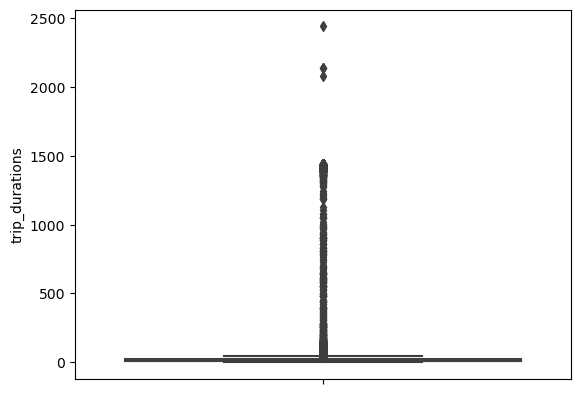

In [24]:
import seaborn as sns
sns.boxplot(y="trip_durations", data =frame_with_durations)
plt.show()

In [25]:
for i in range(0,100,10):
    var =frame_with_durations["trip_durations"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.016666666666666666
10 percentile value is 4.933333333333334
20 percentile value is 6.966666666666667
30 percentile value is 8.866666666666667
40 percentile value is 10.883333333333333
50 percentile value is 13.2
60 percentile value is 15.966666666666667
70 percentile value is 19.583333333333332
80 percentile value is 24.966666666666665
90 percentile value is 34.71666666666667
100 percentile value is  2438.733333333333


In [26]:
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations["trip_durations"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 62.6
99.1 percentile value is 63.766666666666666
99.2 percentile value is 65.03333333333333
99.3 percentile value is 66.61666666666666
99.4 percentile value is 68.35
99.5 percentile value is 70.6
99.6 percentile value is 73.53333333333333
99.7 percentile value is 77.58333333333333
99.8 percentile value is 84.4
99.9 percentile value is 109.46666666666667
100 percentile value is  2438.733333333333


In [18]:
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_durations>1) & (frame_with_durations.trip_durations<90)]

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


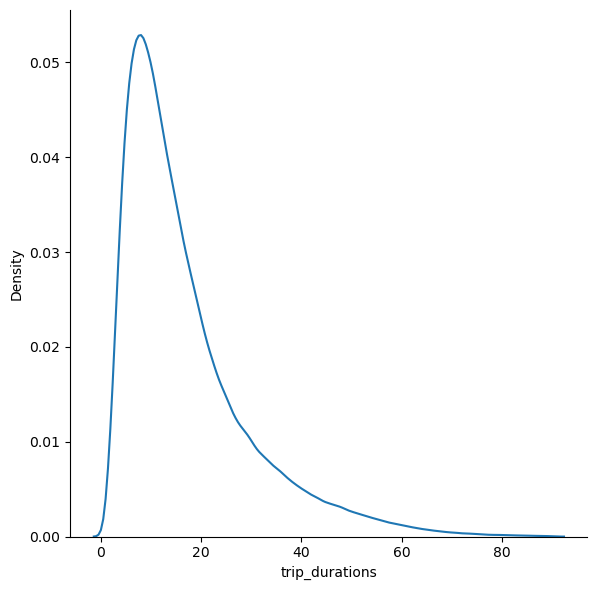

In [28]:
sns.FacetGrid(frame_with_durations_modified,height=6) \
      .map(sns.kdeplot,"trip_durations") \
      .add_legend();
plt.show();

In [29]:
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.162629757785467
91 percentile value is 26.11350293542074
92 percentile value is 27.141205615194057
93 percentile value is 28.25484764542936
94 percentile value is 29.44360902255639
95 percentile value is 30.737541528239202
96 percentile value is 32.20240137221269
97 percentile value is 33.91735537190082
98 percentile value is 36.07492195629553
99 percentile value is 39.417475728155345
100 percentile value is  14624.87229275579


In [30]:
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 39.417475728155345
99.1 percentile value is 39.898916967509024
99.2 percentile value is 40.40655737704918
99.3 percentile value is 40.97111913357401
99.4 percentile value is 41.599101628298705
99.5 percentile value is 42.30868167202571
99.6 percentile value is 43.1685393258427
99.7 percentile value is 44.24812406203101
99.8 percentile value is 45.59488272921109
99.9 percentile value is 47.825512227362864
100 percentile value is  14624.87229275579


In [30]:
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<47.8)]

In [24]:
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

12.693674770736845

In [33]:
frame_with_durations_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988570 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  988570 non-null  float64
 1   trip_distance    988570 non-null  float64
 2   PULongitude      988570 non-null  float64
 3   PULatitude       988570 non-null  float64
 4   DOLatitude       988570 non-null  float64
 5   DOLongitude      988570 non-null  float64
 6   total_amount     988570 non-null  float64
 7   trips_number     988570 non-null  int64  
 8   trip_durations   988570 non-null  float64
 9   pickup_times     988570 non-null  float64
 10  Speed            988570 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 90.5 MB


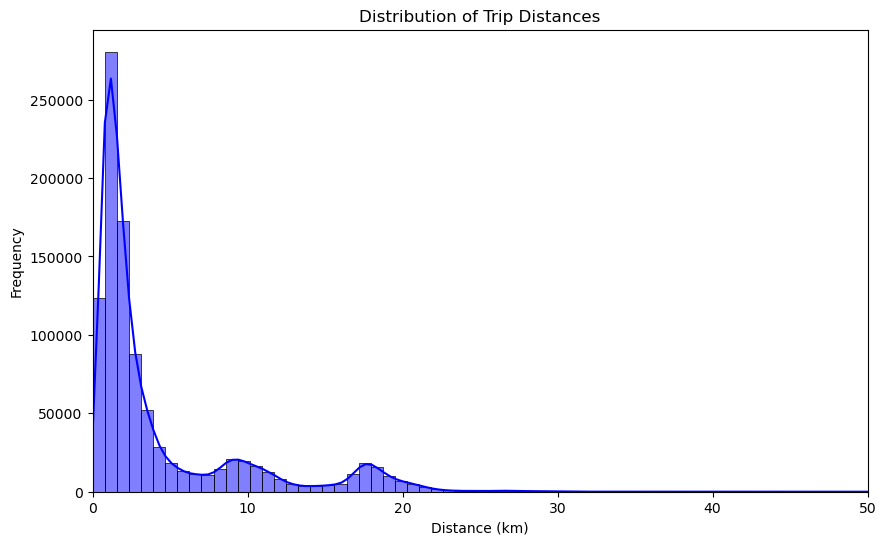

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(frame_with_durations_modified['trip_distance'].values, kde=True, bins=100, color='blue')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

In [40]:
fees_amount_stats = frame_with_durations_modified['total_amount'].describe()
fees_amount_stats

count    988570.000000
mean         31.814623
std          26.181731
min        -695.750000
25%          16.130000
50%          21.800000
75%          35.300000
max         821.000000
Name: total_amount, dtype: float64

In [19]:
frame_with_durations_modified = frame_with_durations_modified[frame_with_durations_modified['total_amount'] > 0]

In [ ]:
## Modelling

In [20]:
y = frame_with_durations_modified['total_amount']
X = frame_with_durations_modified.drop(columns = ['total_amount'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [34]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics

In [35]:
from sklearn.linear_model import LinearRegression
print('model training 0/3 (creating model)', end='\r')
LReg = LinearRegression()

print('model training 1/3 (fitting model)', end='\r')
LReg.fit(X_train, y_train)

print('model training 2/3 (training model)', end='\r')
LReg_y_pred = LReg.predict(X_test)

print('model training 3/3 done!           ', end='\r')

In [39]:
import math
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error,r2_score
def model_evaluation(algorithem_name, X_Test, y_pred, y_true):

    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1-(1-r2)*((len(X_Test)-1)/(len(X_Test)-X_Test.shape[1]-1))
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    x = PrettyTable()
    x.add_row(['R2', r2])
    x.add_row(['Adjusted R2', adj_r2])
    x.add_row(['MSE',mse])
    x.add_row(['RMSE', rmse])
    x.title = algorithem_name
    print(x)

In [40]:
model_evaluation('y True',X_Test=X_test, y_pred=y_test, y_true=y_test)

+-----------------------+
|         y True        |
+-------------+---------+
|   Field 1   | Field 2 |
+-------------+---------+
|      R2     |   1.0   |
| Adjusted R2 |   1.0   |
|     MSE     |   0.0   |
|     RMSE    |   0.0   |
+-------------+---------+


In [60]:
model_evaluation('Linear Regression',X_Test=X_test, y_pred=LReg_y_pred, y_true=y_test)

+----------------------------------+
|        Linear Regression         |
+-------------+--------------------+
|   Field 1   |      Field 2       |
+-------------+--------------------+
|      R2     | 0.914311219199998  |
| Adjusted R2 | 0.9143082951472559 |
|     MSE     | 54.967236168986204 |
|     RMSE    | 7.413989220992043  |
+-------------+--------------------+


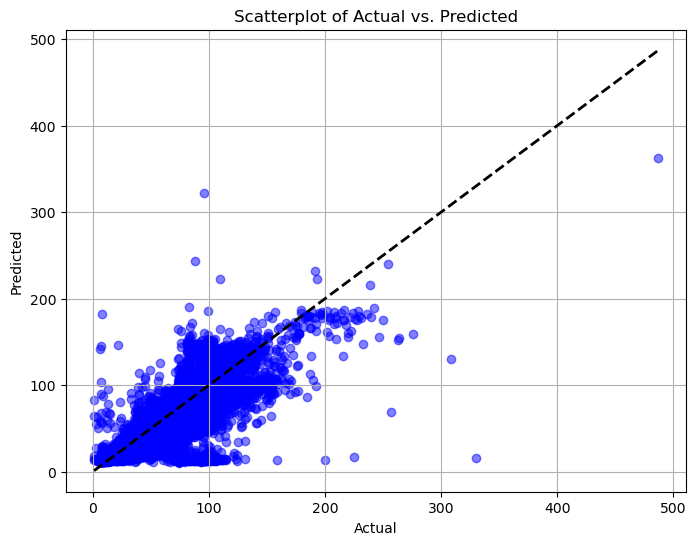

In [78]:
import matplotlib.pyplot as plt
y_pred = LReg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs. Predicted')
plt.grid(True)
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
Ridgeregresi = Ridge()
Ridgeregresi.fit(X_train, y_train)
y_pred_rr = Ridgeregresi.predict(X_train)
y_pred_rr_test = Ridgeregresi.predict(X_test)

In [62]:
model_evaluation('Ridge Regression',X_Test=X_test, y_pred=y_pred_rr_test, y_true=y_test)

+----------------------------------+
|         Ridge Regression         |
+-------------+--------------------+
|   Field 1   |      Field 2       |
+-------------+--------------------+
|      R2     | 0.9143112192521786 |
| Adjusted R2 | 0.9143082951994381 |
|     MSE     | 54.96723613551361  |
|     RMSE    | 7.413989218734649  |
+-------------+--------------------+


In [31]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(n_estimators = 10)
model_2.fit(X_train, y_train)
XG_y_pred = model_2.predict(X_test)

In [76]:
model_evaluation('XGBoost',X_Test=X_test, y_pred=XG_y_pred, y_true=y_test)

+----------------------------------+
|             XGBoost              |
+-------------+--------------------+
|   Field 1   |      Field 2       |
+-------------+--------------------+
|      R2     | 0.9481262903400424 |
| Adjusted R2 | 0.9481246991382246 |
|     MSE     | 33.33603333815903  |
|     RMSE    | 5.773736514438378  |
+-------------+--------------------+


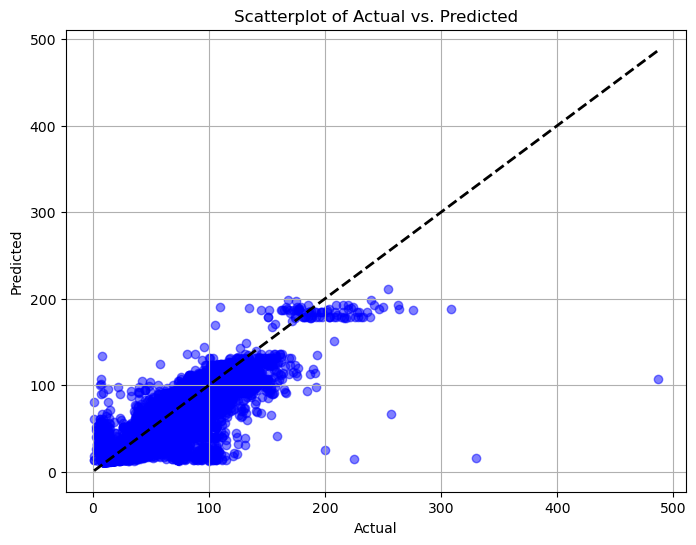

In [77]:
import matplotlib.pyplot as plt

y_pred = model_2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs. Predicted')
plt.grid(True)
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor
print('model training 0/3 (creating model)', end='\r')
RFRegr = RandomForestRegressor()

print('model training 1/3 (fitting model)', end='\r')
RFRegr.fit(X_train, y_train)

print('model training 2/3 (training model)', end='\r')
RFRegr_y_pred = RFRegr.predict(X_test)

print('model training 3/3 done!           ', end='\r')

KeyboardInterrupt: 

In [ ]:
model_evaluation('Random Forest Regressor',X_Test=X_test, y_pred=RFRegr_y_pred, y_true=y_test)

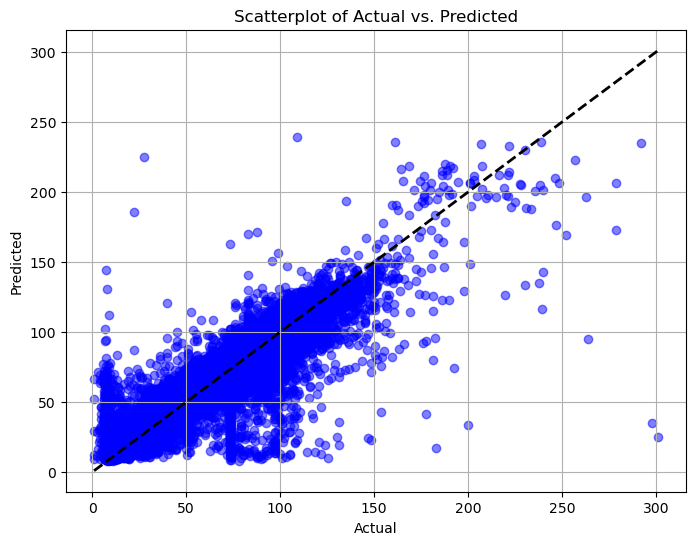

In [23]:
import matplotlib.pyplot as plt
y_pred = RFRegr.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, RFRegr_y_pred, color='blue', alpha=0.5)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs. Predicted')
plt.grid(True)
plt.show()

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

model = Sequential([
    GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=100),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=128)
mse = model.evaluate(np.array(X_test), np.array(y_test))
print("Mean Squared Error:", mse)





Epoch 1/5

5343/5343 [==============================] - 384s 70ms/step - loss: 112.7228
Epoch 2/5
5343/5343 [==============================] - 380s 71ms/step - loss: 37.9922
Epoch 3/5
5343/5343 [==============================] - 271s 51ms/step - loss: 36.4804
Epoch 4/5
5343/5343 [==============================] - 369s 69ms/step - loss: 35.7004
Epoch 5/5
9159/9159 [==============================] - 176s 19ms/step - loss: 34.1506
Mean Squared Error: 34.15064239501953


In [ ]:
GRU_y_pred = model.predict(X_test)

In [31]:
model_evaluation('Gated Recurrent Unit',X_Test=X_test, y_pred=GRU_y_pred, y_true=y_test)

9159/9159 [==============================] - 84s 9ms/step
+----------------------------------+
|       Gated Recurrent Unit       |
+-------------+--------------------+
|   Field 1   |      Field 2       |
+-------------+--------------------+
|      R2     | 0.9468466139215279 |
| Adjusted R2 | 0.9468448001099312 |
|     MSE     | 34.09658415581763  |
|     RMSE    | 5.839228044512188  |
+-------------+--------------------+


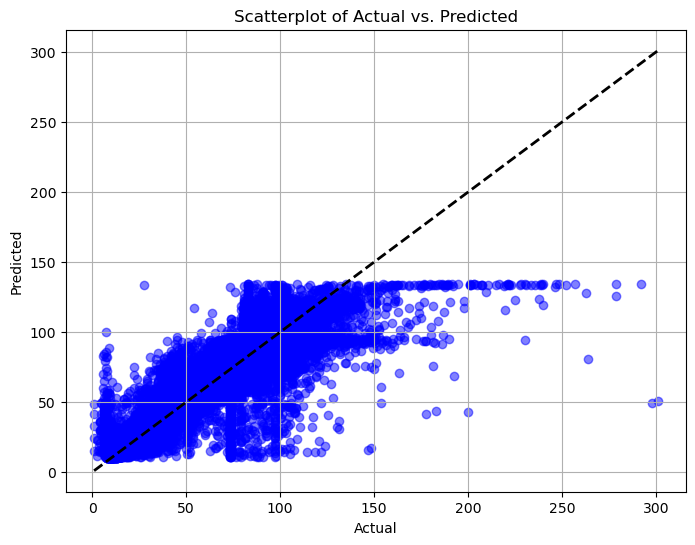

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, GRU_y_pred, color='blue', alpha=0.5) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs. Predicted')
plt.grid(True)
plt.show()


# Hybrid Models

In [42]:
# Linear Regression & XGBoost
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
hybrid_predictions = (lr_predictions + xgb_predictions) / 2

In [41]:
model_evaluation('Hybrid Mode',X_Test=X_test, y_pred=hybrid_predictions, y_true=y_test)

+----------------------------------+
|           Hybrid Mode            |
+-------------+--------------------+
|   Field 1   |      Field 2       |
+-------------+--------------------+
|      R2     | 0.9528219036837976 |
| Adjusted R2 | 0.9528202937736014 |
|     MSE     | 30.26358337701797  |
|     RMSE    | 5.501234713863604  |
+-------------+--------------------+


In [ ]:
# xgboost + GRU

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
hybrid_prediction_1 = (GRU_y_pred + xgb_predictions) / 2

In [ ]:
model_evaluation('Hybrid Model With xgboost & GRU',X_Test=X_test, y_pred=hybrid_prediction_1, y_true=y_test)

In [ ]:
# linear regression + GRU

In [ ]:
hybrid_prediction_2 = (GRU_y_pred + lr_predictions) / 2

In [ ]:
model_evaluation('Hybrid Model With linear regression & GRU',X_Test=X_test, y_pred=hybrid_prediction_2, y_true=y_test)

In [ ]:
##################